# Imports

In [1]:
# standard
    # arrays & DF
import pandas as pd
import numpy as np
    # stats
from scipy import stats
    # access
import os
import requests
    # random
import random

# vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
    # regex
import re
import unicodedata
import nltk
    # tokenizer
from nltk.tokenize.toktok import ToktokTokenizer
    # stopwords
from nltk.corpus import stopwords
    # web scraper
from bs4 import BeautifulSoup
    # ?
from wordcloud import WordCloud

# scripts
import wrangle as w
import env


## Acquire

In [2]:
df = w.process_all_repos()

In [3]:
df.head()

Unnamed: 0                                      repo language  \
0           0          /facebookresearch/ResponsibleNLP   Python   
1           1       /facebookresearch/projectaria_tools      C++   
2           2   /facebookresearch/HolisticTraceAnalysis   Python   
3           3                /facebookresearch/fairseq2   Python   
4           4  /facebookresearch/seamless_communication   Python   

                                     readme_contents  
0  This repository hosts code and datasets relati...  
1  # Project Aria Tools

Project Aria Tools is a ...  
2  [![CircleCI](https://circleci.com/gh/facebookr...  
3  <p align="center">
  <img src="doc/static/img/...  
4  ![](seamlessM4T.png)
# SeamlessM4T
SeamlessM4T...

## Prepare

##### Prepare Steps:
- Lowercase All Text
- Remove accented characters and non-ASCII characters
- Remove special characters
- Tokenize
- Lemmatize
- Remove Stopwords
- Add extra Stopwords

In [4]:
df = w.transform_data(df, extra_stopwords=['githubcom', "'"])

In [5]:
df.head()

Unnamed: 0                                      repo language  \
0           0          /facebookresearch/ResponsibleNLP   Python   
1           1       /facebookresearch/projectaria_tools      C++   
2           2   /facebookresearch/HolisticTraceAnalysis   Python   
3           3                /facebookresearch/fairseq2   Python   
4           4  /facebookresearch/seamless_communication   Python   

                                            original  \
0  This repository hosts code and datasets relati...   
1  # Project Aria Tools

Project Aria Tools is a ...   
2  [![CircleCI](https://circleci.com/gh/facebookr...   
3  <p align="center">
  <img src="doc/static/img/...   
4  ![](seamlessM4T.png)
# SeamlessM4T
SeamlessM4T...   

                                               clean  \
0  repository hosts code datasets relating respon...   
1  project aria tools project aria tools suite c ...   
2  circlecihttps circlecicom gh facebookresearch ...   
3  p aligncenter img srcdoc static img logopng wi...   
4  seamlessm4tpng seamlessm4t seamlessm4t designe...   

                                           lematized  
0  repository host code datasets relating respons...  
1  project aria tool project aria tool suite c py...  
2  circlecihttps circlecicom gh appcirclecicom pi...  
3  p aligncenter img srcdoc static img logopng wi...  
4  seamlessm4tpng seamlessm4t seamlessm4t designe...

In [6]:
df.language.unique()

<StringArray>
[          'Python',              'C++', 'Jupyter Notebook',
       'JavaScript',             'Rust',       'TypeScript',
              'MDX',             'HTML',                'C',
             'Cuda',         'Markdown',     'OpenEdge ABL',
    'Objective-C++',              'TeX',       'Dockerfile',
                'R',           'MATLAB',    'SystemVerilog',
              'Coq',             'Roff',            'Scala',
           'Kotlin',              'Lua',               'C#',
               'Go',            'Shell',             'Java',
             'Ruby',        'PureBasic']
Length: 29, dtype: string

## Explore

In [7]:
# getting all words joined for each language
py_words = ' '.join(df[df.language == 'Python'].lematized)
c_words = ' '.join(df[df.language == 'C++'].lematized)
mark_words = ' '.join(df[df.language == 'Markdown'].lematized)
all_words = ' '.join(df.lematized)

In [8]:
# List lema will be lematized words in list format
c = []
for i, val in enumerate(df.lematized):
     c.append(val.split())
df['list_lema'] = c

In [9]:
# Get word counts for each language
py_counts =pd.Series(py_words.split()).value_counts()
c_counts =pd.Series(c_words.split()).value_counts()
mark_counts =pd.Series(mark_words.split()).value_counts()
all_counts =pd.Series(all_words.split()).value_counts()

In [10]:
df['len_lematized'] = df['lematized'].str.len()


Checking distributions of Python:


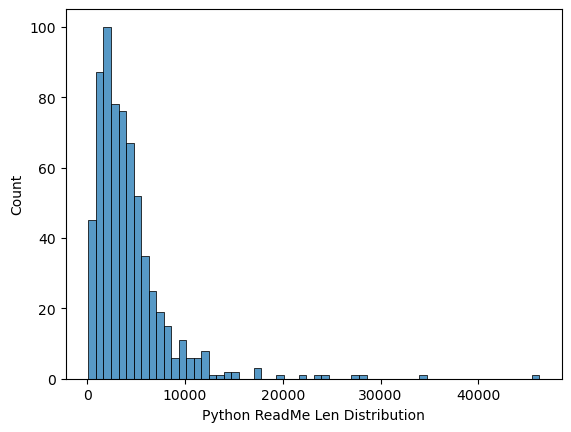

+ + + + + + + + + + + + + + + +
Checking distributions of C++:


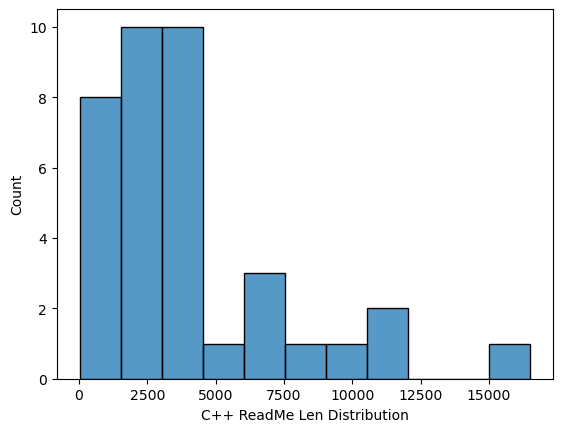

+ + + + + + + + + + + + + + + +
Checking distributions of Other:


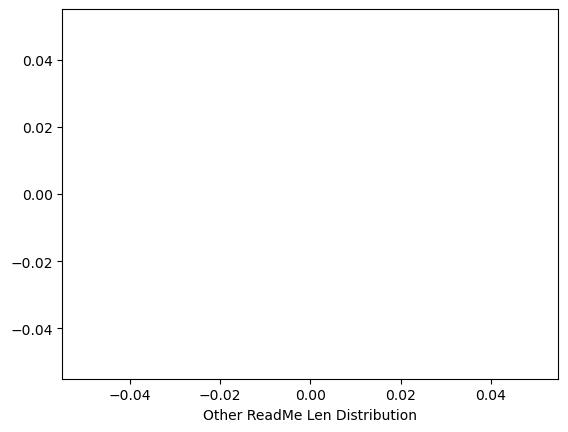

+ + + + + + + + + + + + + + + +
Checking distributions of Markdown:


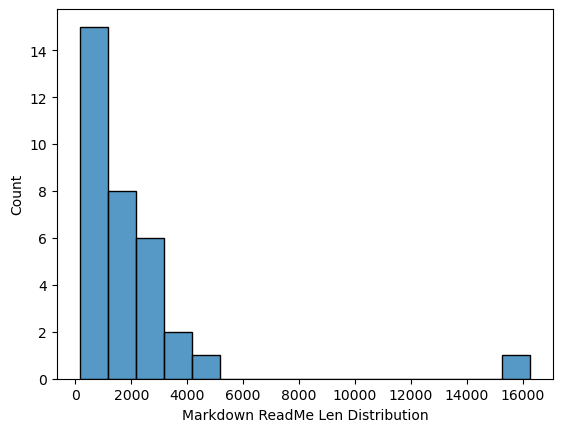

+ + + + + + + + + + + + + + + +
Checking distributions of All:


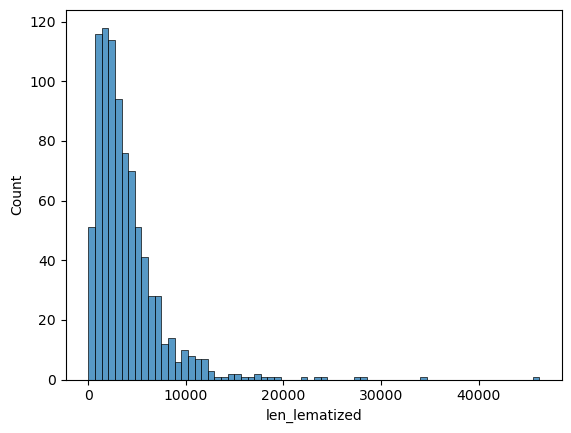

+ + + + + + + + + + + + + + + +


In [11]:
# Checking readme word len distributions
w.language_distributions(df)

In [12]:
all_counts

model              6279
data               3749
python             3643
file               3084
training           2828
                   ... 
000269                1
trifinger             1
dfc276807496png       1
888e                  1
openreview            1
Name: count, Length: 46823, dtype: int64

In [13]:
# What are the most frequent py words?
py_counts.head(20)

model       5455
python      3154
data        3092
training    2523
file        2436
run         2217
td          2072
code        2040
use         1949
1           1926
dataset     1762
install     1758
license     1634
using       1389
example     1384
script      1351
train       1339
http        1292
image       1277
bash        1232
Name: count, dtype: int64

In [14]:
# What are the most frequent c words?
c_counts.head(20)

install     146
build       141
example     138
model       138
1           121
file        116
use         115
python      109
run         107
data        101
x           101
c           100
game         92
see          90
habitat      84
cd           76
0            74
license      74
training     74
2            72
Name: count, dtype: int64

In [15]:
# What are the most frequent Markdown words?
mark_counts.head(20)

data           144
dataset        122
file           117
contains        83
license         77
participant     74
directory       65
session         50
1               49
model           48
audio           47
language        44
frame           42
video           41
paper           38
microphone      38
pose            38
used            35
system          34
camera          33
Name: count, dtype: int64

<div class="alert alert-block alert-info"> 
<b>Takeaway:</b>
    
- Words like 
- Words like 
</div>

In [16]:
all_counts

model              6279
data               3749
python             3643
file               3084
training           2828
                   ... 
000269                1
trifinger             1
dfc276807496png       1
888e                  1
openreview            1
Name: count, Length: 46823, dtype: int64

In [17]:
#Combine the value counts into one dataframe
word_counts = pd.concat([py_counts, c_counts, mark_counts, all_counts], axis=1)
word_counts.columns = ['py_counts', 'c_counts', 'mark_counts', 'all_counts']

# Fill the nulls with 0
word_counts.fillna(0, inplace=True)
#Recast all columns as integers
word_counts = word_counts.astype('int')

#take a look
word_counts.head()

py_counts  c_counts  mark_counts  all_counts
model          5455       138           48        6279
python         3154       109            6        3643
data           3092       101          144        3749
training       2523        74           19        2828
file           2436       116          117        3084

In [18]:
# Get word frequencies for each language
py_freq =pd.Series(py_words.split()).value_counts(normalize=True)* 100
c_freq = pd.Series(c_words.split()).value_counts(normalize=True)* 100
mark_freq = pd.Series(mark_words.split()).value_counts(normalize=True)* 100
all_freq = pd.Series(all_words.split()).value_counts(normalize=True)* 100

In [19]:
#Combine the value counts into one dataframe
word_freq = pd.concat([py_freq, c_freq, mark_freq, all_freq], axis=1)
word_freq.columns = ['py_freq', 'c_freq', 'mark_freq', 'all_freq']

# Fill the nulls with 0
word_freq.fillna(0, inplace=True)

#take a look
word_freq.head()

py_freq    c_freq  mark_freq  all_freq
model     1.436116  0.664132   0.526778  1.323416
python    0.830341  0.524568   0.065847  0.767830
data      0.814018  0.486068   1.580334  0.790171
training  0.664220  0.356129   0.208516  0.596054
file      0.641316  0.558256   1.284021  0.650010

# Explore Questions:
#### Looking at **TOP 2** most frequent word of every languages:
- unigram
- bigram
- trigram

### 1. Is `'model'` statistically significant to Python compared to *All* other languages
- 1a. Engineer column that counts `'model'` within every value
- 1b. Compare that by language

In [29]:
# engineer column that counts 'model' within every value
df['model_count'] = df.lematized.str.count('model')
df['has_model'] = df.lematized.str.contains('model').astype(int)
model_python = df.model_count[df['language'] == 'Python']
has_model_python = df.has_model[df['language'] == 'Python']

In [36]:
observed

has_model    0    1
has_model          
0          110    0
1            0  543

In [42]:
observed = pd.crosstab(has_model_python,df['has_model'])
p = stats.chisquare(observed)
p

w.chi2_test(has_model_python,df['has_model'])

Power_divergenceResult(statistic=array([110., 543.]), pvalue=array([9.79907384e-026, 4.19558142e-120]))

In [22]:
# running 1 sample ttest on model count in python vs model avg count
w.t_test(model_python, df['model_count'].mean())

# compare that by language

# ttest or chi2

We can reject the null hypothesis with a p-score of: {0.010973440716815991}


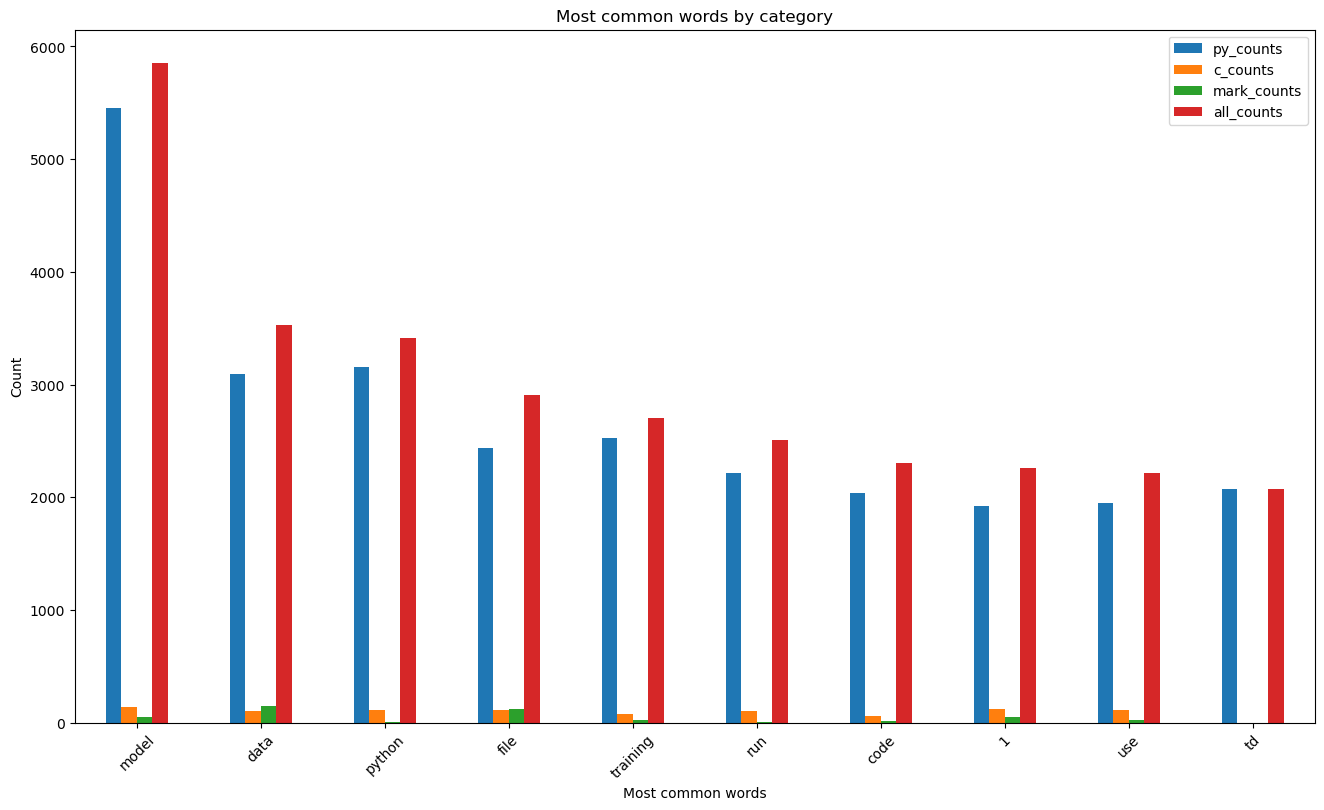

In [ ]:
#Plot the most frequent words and color by label
word_counts.sort_values('all_counts', ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most common words by category')
plt.ylabel('Count')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

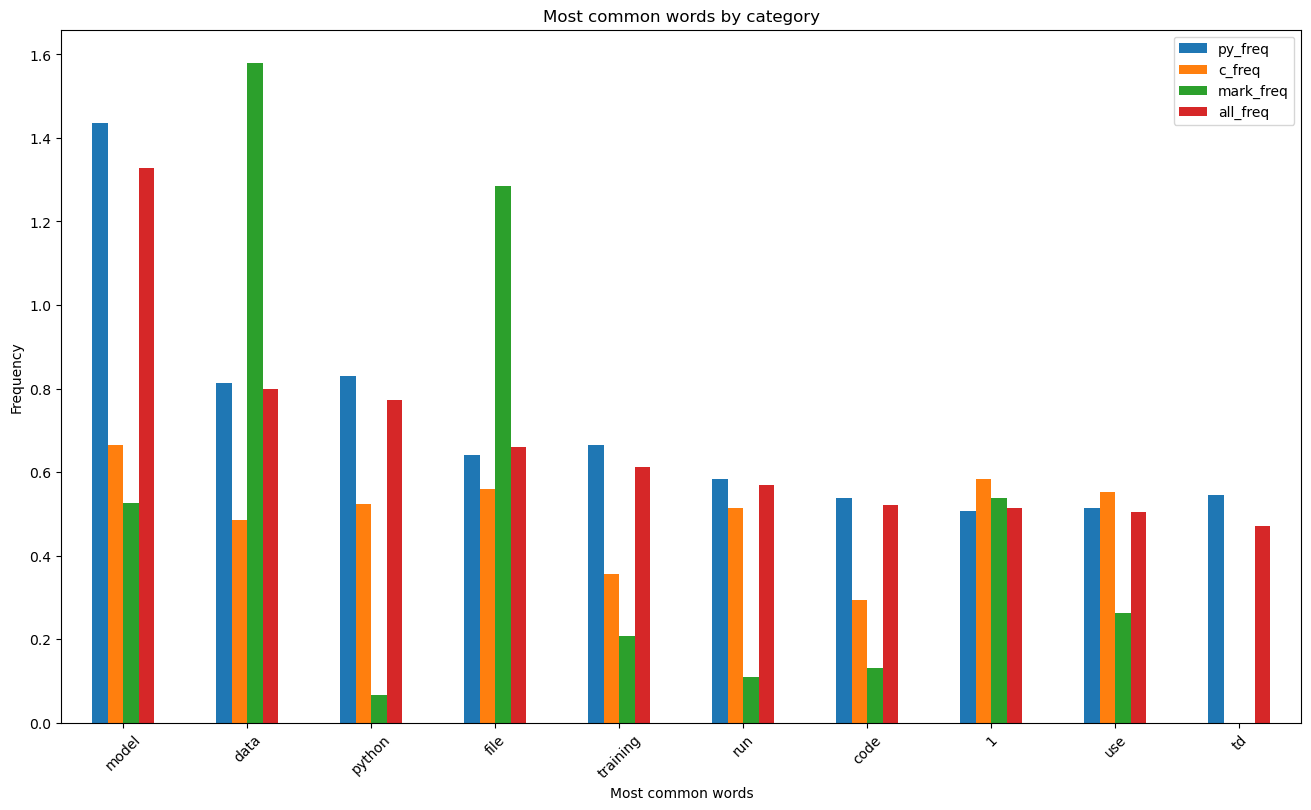

In [ ]:
#Plot the most frequent words and color by label
word_freq.sort_values('all_freq', ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most common words by category')
plt.ylabel('Frequency')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create dataframe with the word counts and frequencies for each language
words = pd.concat([word_counts, word_freq], axis=1)

In [ ]:
# Look at the highest percent python words
words.sort_values('py_freq', ascending=False).head(10)

py_counts  c_counts  mark_counts  all_counts   py_freq    c_freq  \
model          5455       138           48        5856  1.436116  0.664132   
python         3154       109            6        3409  0.830341  0.524568   
data           3092       101          144        3524  0.814018  0.486068   
training       2523        74           19        2700  0.664220  0.356129   
file           2436       116          117        2906  0.641316  0.558256   
run            2217       107           10        2507  0.583661  0.514943   
td             2072         0            0        2074  0.545487  0.000000   
code           2040        61           12        2300  0.537063  0.293566   
use            1949       115           24        2218  0.513105  0.553443   
1              1926       121           49        2261  0.507050  0.582319   

          mark_freq  all_freq  
model      0.526778  1.328708  
python     0.065847  0.773491  
data       1.580334  0.799584  
training   0.208516  0.612621  
file       1.284021  0.659362  
run        0.109745  0.568830  
td         0.000000  0.470584  
code       0.131694  0.521863  
use        0.263389  0.503257  
1          0.537752  0.513014

In [ ]:
# Look at the highest percent c words
words.sort_values('c_freq', ascending=False).head(10)

py_counts  c_counts  mark_counts  all_counts   py_freq    c_freq  \
install       1758       146            7        2058  0.462822  0.702632   
build          225       141            4         477  0.059235  0.678570   
model         5455       138           48        5856  1.436116  0.664132   
example       1384       138           10        1657  0.364360  0.664132   
1             1926       121           49        2261  0.507050  0.582319   
file          2436       116          117        2906  0.641316  0.558256   
use           1949       115           24        2218  0.513105  0.553443   
python        3154       109            6        3409  0.830341  0.524568   
run           2217       107           10        2507  0.583661  0.514943   
x              230       101            9         387  0.060551  0.486068   

         mark_freq  all_freq  
install   0.076822  0.466954  
build     0.043898  0.108230  
model     0.526778  1.328708  
example   0.109745  0.375968  
1         0.537752  0.513014  
file      1.284021  0.659362  
use       0.263389  0.503257  
python    0.065847  0.773491  
run       0.109745  0.568830  
x         0.098771  0.087809

In [ ]:
# Look at the highest percent markdown words
words.sort_values('mark_freq', ascending=False).head(10)

py_counts  c_counts  mark_counts  all_counts   py_freq    c_freq  \
data              3092       101          144        3524  0.814018  0.486068   
dataset           1762        49          122        2000  0.463875  0.235815   
file              2436       116          117        2906  0.641316  0.558256   
contains           539        30           83         733  0.141900  0.144377   
license           1634        74           77        1949  0.430177  0.356129   
participant         22         0           74         100  0.005792  0.000000   
directory          660        24           65         802  0.173756  0.115501   
session             33         0           50          85  0.008688  0.000000   
1                 1926       121           49        2261  0.507050  0.582319   
model             5455       138           48        5856  1.436116  0.664132   

             mark_freq  all_freq  
data          1.580334  0.799584  
dataset       1.338894  0.453794  
file          1.284021  0.659362  
contains      0.910887  0.166315  
license       0.845040  0.442222  
participant   0.812116  0.022690  
directory     0.713345  0.181971  
session       0.548727  0.019286  
1             0.537752  0.513014  
model         0.526778  1.328708

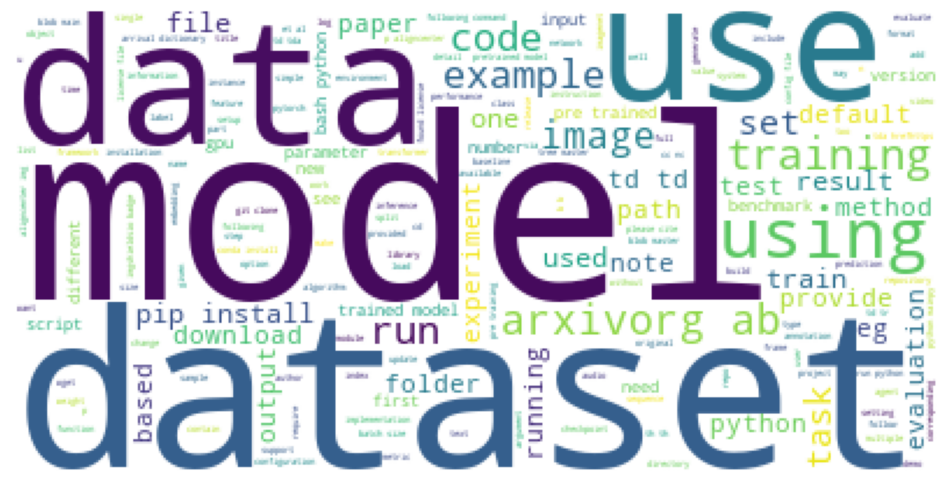

In [ ]:
# Word Cloud for All words
all_cloud = WordCloud(background_color='white').generate(all_words)
plt.figure(figsize=(12, 8))
plt.imshow(all_cloud)
plt.axis('off')
plt.show()

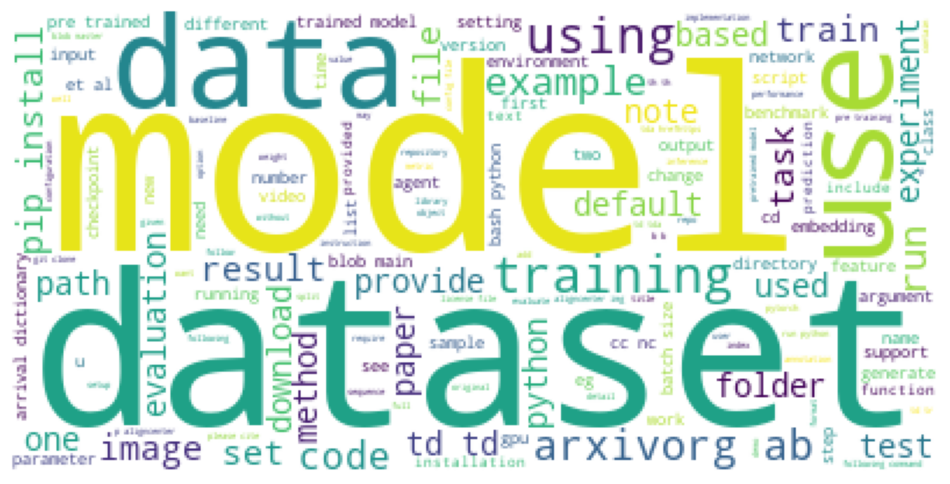

In [ ]:
# Word Cloud for Python words
py_cloud = WordCloud(background_color='white').generate(py_words)
plt.figure(figsize=(12, 8))
plt.imshow(py_cloud)
plt.axis('off')
plt.show()


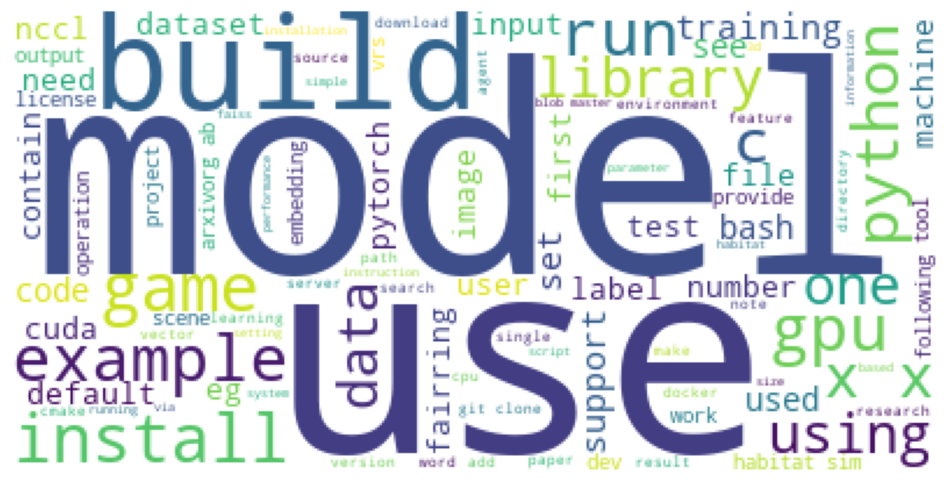

In [ ]:
# Word Cloud for C words
c_cloud = WordCloud(background_color='white').generate(c_words)
plt.figure(figsize=(12, 8))
plt.imshow(c_cloud)
plt.axis('off')
plt.show()

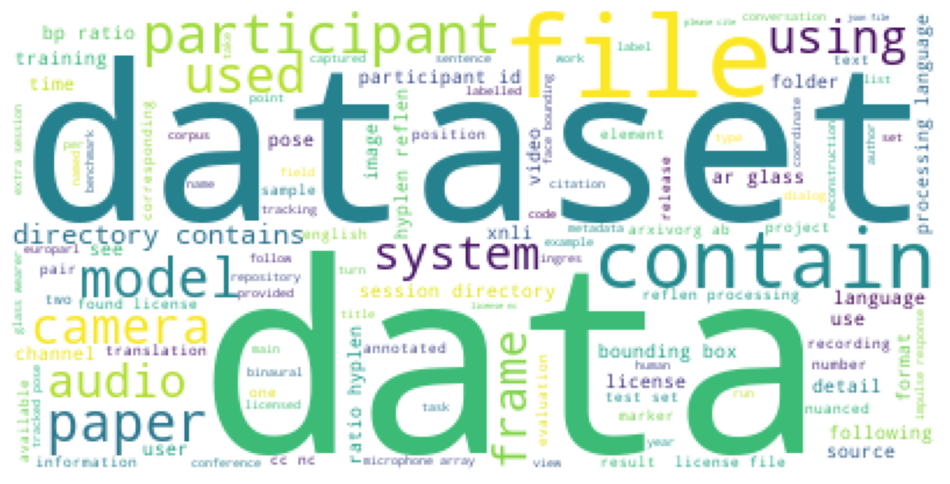

In [ ]:
# Word Cloud for markdown words
mark_cloud = WordCloud(background_color='white').generate(mark_words)
plt.figure(figsize=(12, 8))
plt.imshow(mark_cloud)
plt.axis('off')
plt.show()

In [ ]:
# Bigrams!
all_bigrams = (pd.Series(nltk.ngrams(all_words.split(), 2)))
py_bigrams = (pd.Series(nltk.ngrams(py_words.split(), 2)))
c_bigrams = (pd.Series(nltk.ngrams(c_words.split(), 2)))
mark_bigrams = (pd.Series(nltk.ngrams(mark_words.split(), 2)))

# Top 20 most common bigrams
top_20_all_bigrams = all_bigrams.value_counts().head(20)
top_20_py_bigrams = py_bigrams.value_counts().head(20)
top_20_c_bigrams = c_bigrams.value_counts().head(20)
top_20_mark_bigrams = mark_bigrams.value_counts().head(20)

In [ ]:
word_freq.head()

py_freq    c_freq  mark_freq  all_freq
model     1.436116  0.664132   0.526778  1.328708
python    0.830341  0.524568   0.065847  0.773491
data      0.814018  0.486068   1.580334  0.799584
training  0.664220  0.356129   0.208516  0.612621
file      0.641316  0.558256   1.284021  0.659362

<Axes: >

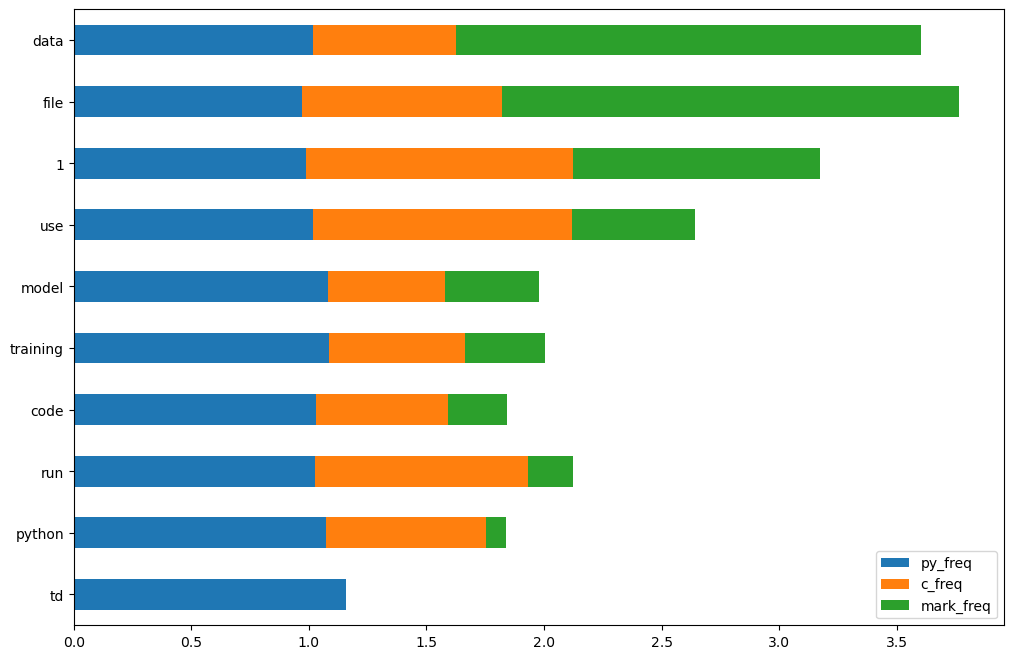

In [ ]:
# Visualize language bigrams as percent of all word counts
(word_freq.sort_values(by='all_freq', ascending=False)
    .head(10)
    .apply(lambda row: row / row['all_freq'], axis=1)
    .drop(columns=['all_freq'])
    .sort_values(by='mark_freq')
    .plot.barh(stacked=True, figsize=(12, 8)))

In [ ]:
# Trigrams!
all_trigrams = (pd.Series(nltk.ngrams(all_words.split(), 3)))
py_trigrams = (pd.Series(nltk.ngrams(py_words.split(), 3)))
c_trigrams = (pd.Series(nltk.ngrams(c_words.split(), 3)))
mark_trigrams = (pd.Series(nltk.ngrams(mark_words.split(), 3)))

# Top 20 most common trigrams
top_20_all_trigrams = all_trigrams.value_counts().head(20)
top_20_py_trigrams = py_trigrams.value_counts().head(20)
top_20_c_trigrams = c_trigrams.value_counts().head(20)
top_20_mark_trigrams = mark_trigrams.value_counts().head(20)

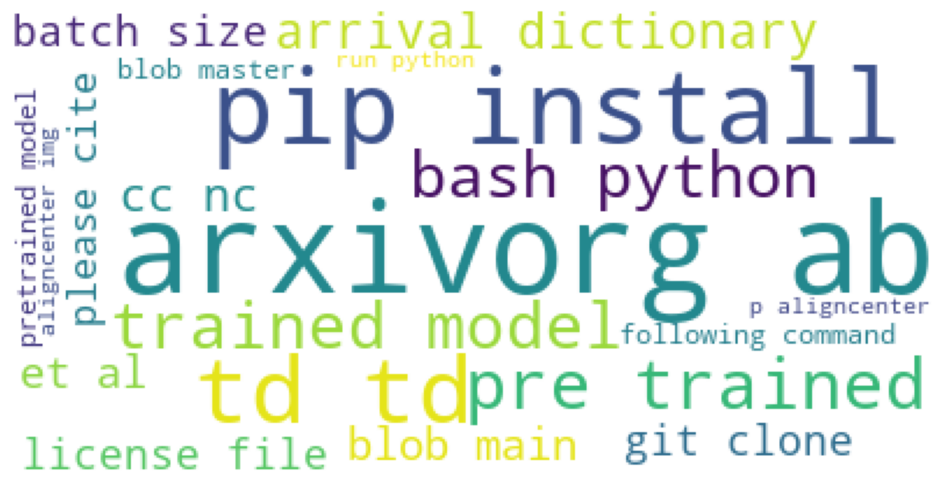

In [ ]:
# Word Cloud for all bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_all_bigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

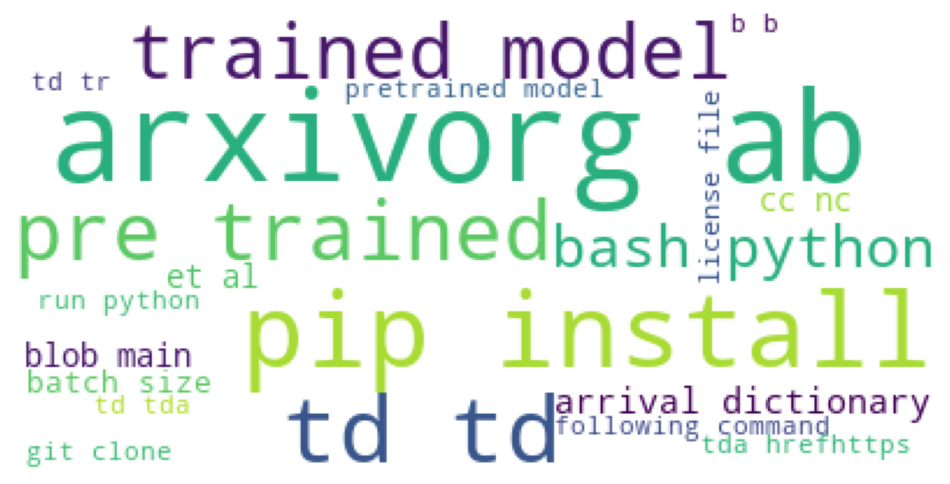

In [ ]:
# Word Cloud for py bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_py_bigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

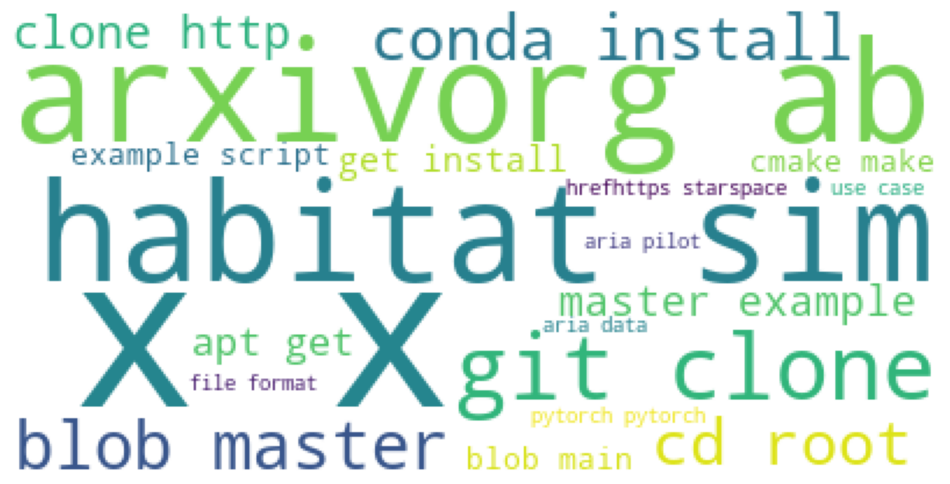

In [ ]:
# Word Cloud for c bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_c_bigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

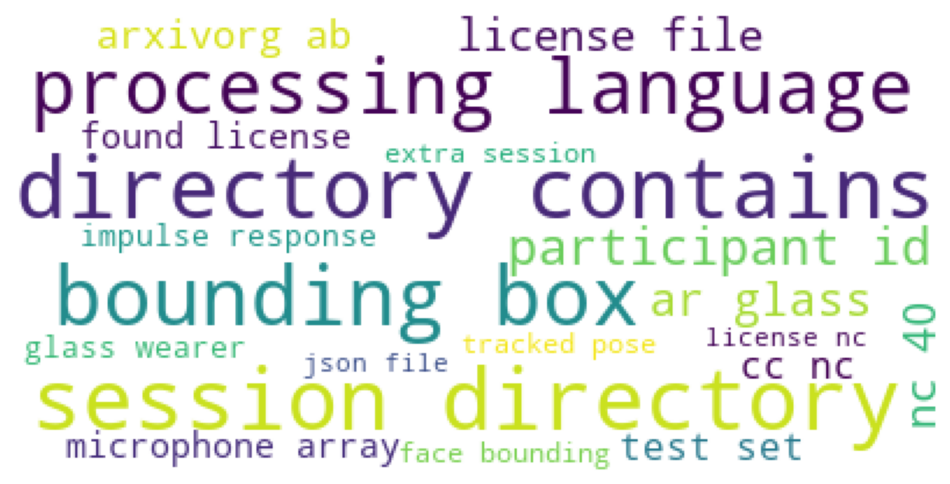

In [ ]:
# Word Cloud for mark bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_mark_bigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

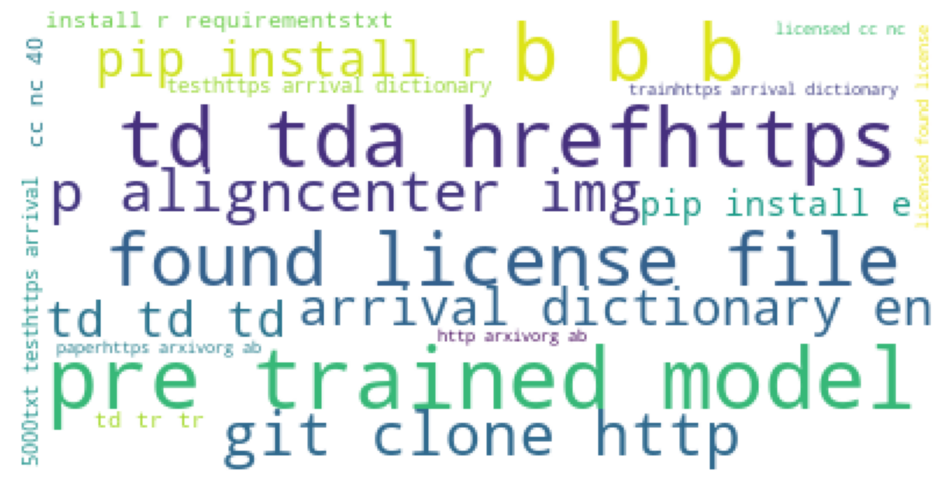

In [ ]:
# Word Cloud for all trigrams
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_all_trigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

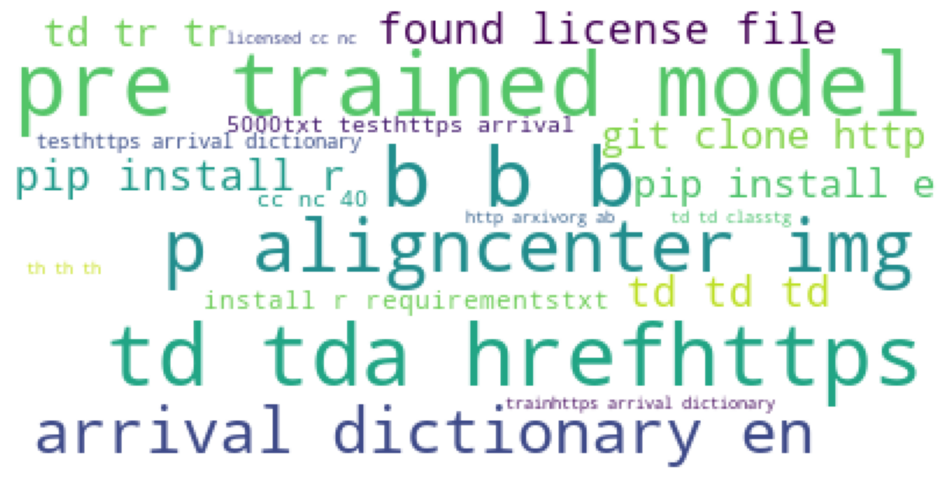

In [ ]:
# Word Cloud for py trigrams
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_py_trigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

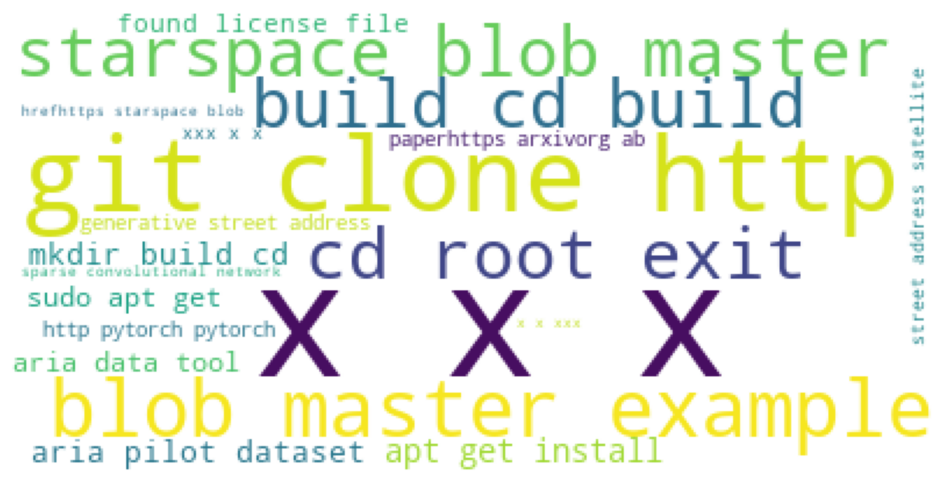

In [ ]:
# Word Cloud for c trigrams
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_c_trigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

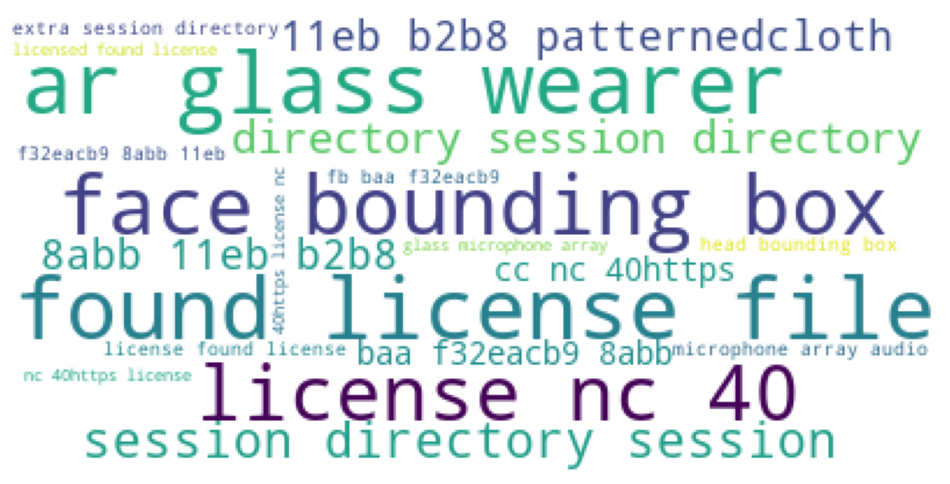

In [ ]:
# Word Cloud for mark trigrams
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_mark_trigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

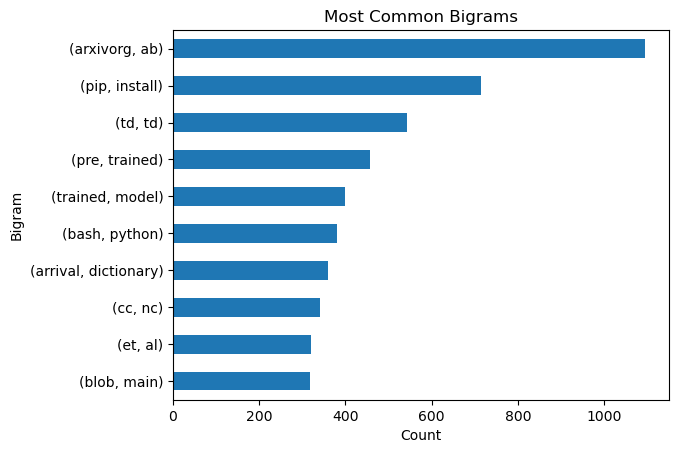

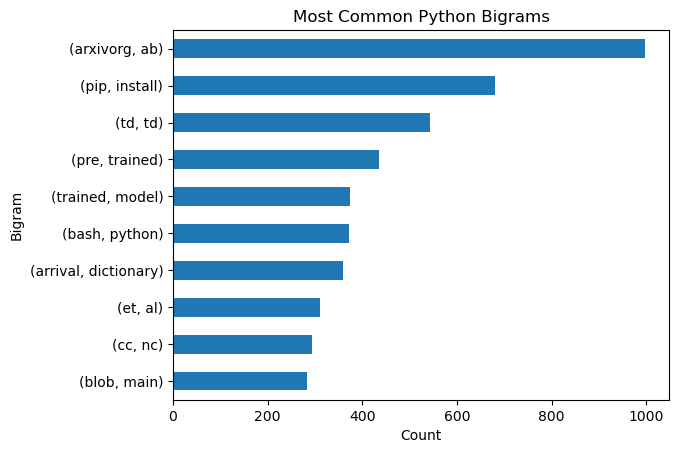

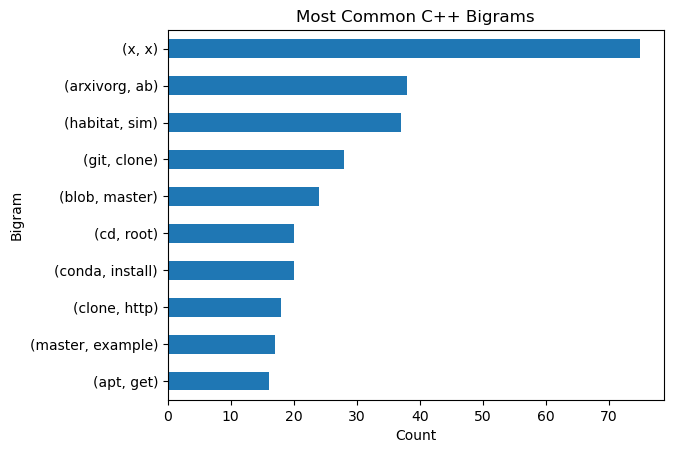

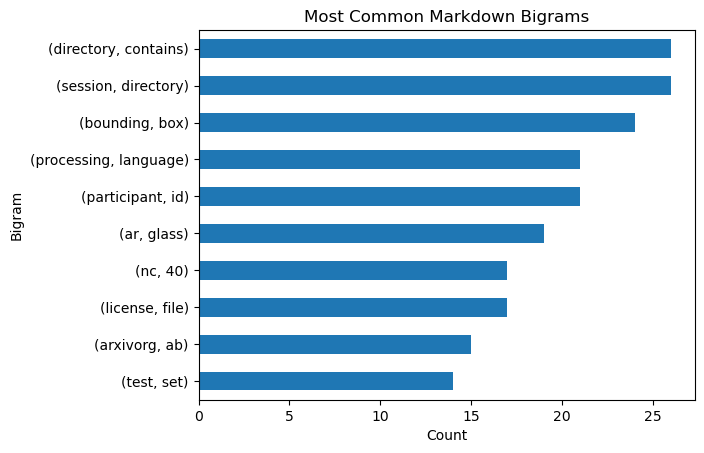

In [ ]:
top_20_all_bigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Bigrams')
plt.show()

top_20_py_bigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Python Bigrams')
plt.show()

top_20_c_bigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common C++ Bigrams')
plt.show()

top_20_mark_bigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Markdown Bigrams')
plt.show()

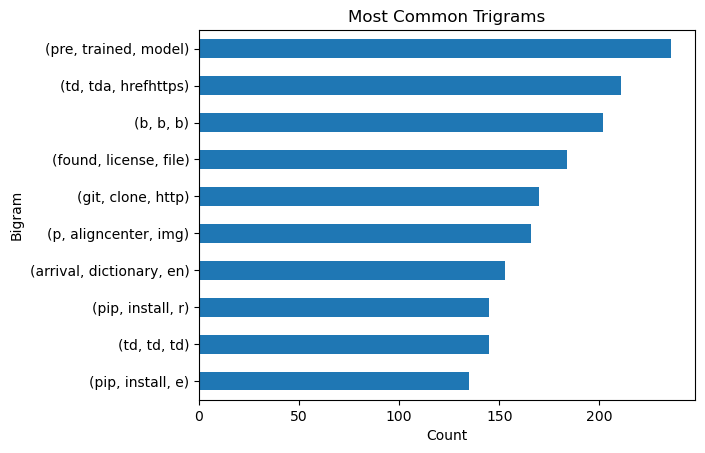

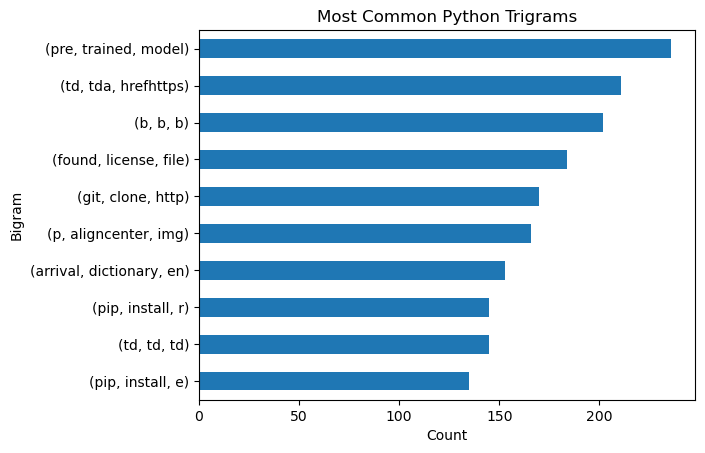

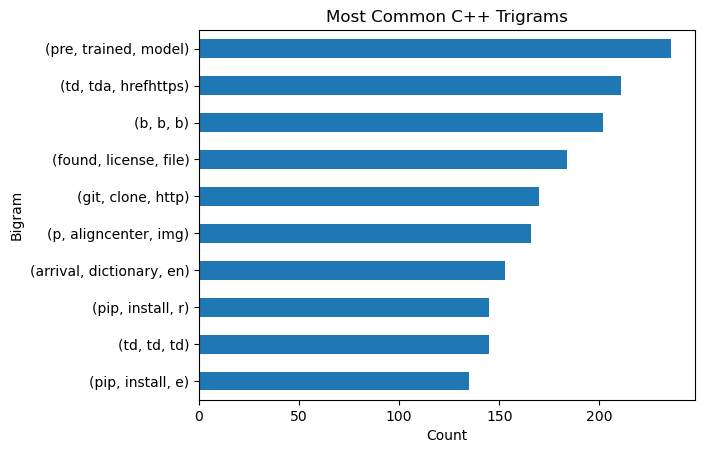

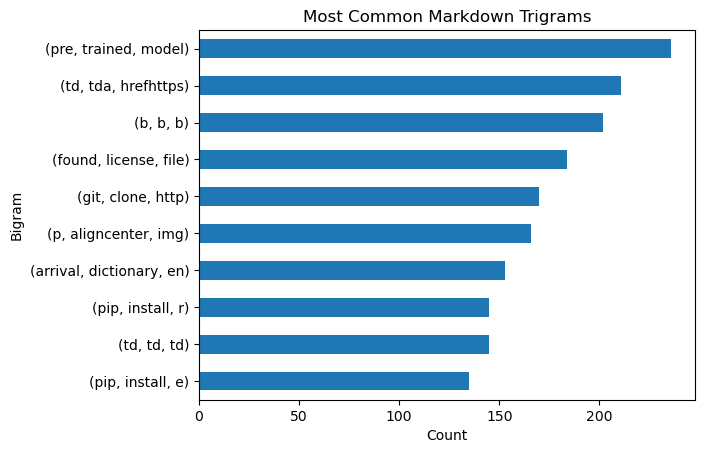

In [ ]:
top_20_all_trigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Trigrams')
plt.show()

top_20_all_trigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Python Trigrams')
plt.show()

top_20_all_trigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common C++ Trigrams')
plt.show()

top_20_all_trigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Markdown Trigrams')
plt.show()

## Modeling

### Feature Extraction:  TF-IDF

- **TF**: Term Frequency; how often a word appears in a document.
- **IDF**: Inverse Documnet Frequency; a measure based on in how many documents will a word appear.
- **TF-IDF**: A combination of the two measures above.